In [2]:
import torch
from torch.nn import functional as F
import matplotlib.pyplot as plt

##### 1、生成数据
—— torch.cat((﹡,﹡)) 合并数据

—— *.type(torch.LongTensor) 控制类型

In [7]:
data_num = 100

# 构建data
x = torch.unsqueeze(torch.linspace(-1,1,data_num), dim=1)
# 构建label
y0 = torch.zeros(50) 
y1 = torch.ones(50)
y = torch.cat((y0, y1)).type(torch.LongTensor)   # 合并数据

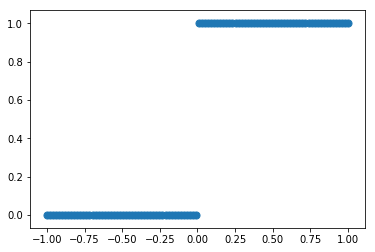

In [8]:
plt.scatter(x.data, y.data, s=50, cmap='autumn')
plt.show()

##### 2、构建分类网络

In [9]:
class SimpleNet(torch.nn.Module):
    def __init__(self, n_features, n_hidden, n_output):
        super(SimpleNet, self).__init__()
        self.hidden = torch.nn.Linear(n_features, n_hidden)
        self.predict = torch.nn.Linear(n_hidden, n_output)
    
    def forward(self, x):
        hidden_result = self.hidden(x)
        x = F.relu(hidden_result)
        x = self.predict(x)
        return x

##### 3、设置网络参数

#####  定义分类精度评估函数
计算被正确分类的精度，精度越高越好

In [48]:
def get_acc(labels, outputs):
    '''get_acc: Get the classification accuracy
        Inputs: labels: the ground truth;
                outputs: the predicted labels of a DNN
        Outputs: the accuracy
    '''
    _, predicted = torch.max(outputs.data, 1)   # 记录每一组数据的预测类型
    data_num = y.shape[0]*1.0
    
    #item() to get a Python number from a tensor containing a single value:
    correct_num = (predicted == labels).sum().item()
    accuracy = correct_num/data_num
    return accuracy

In [49]:
mynet = SimpleNet(1,10,2)   # 2分类器
print(mynet.parameters)

optimizer = torch.optim.SGD(mynet.parameters(), lr=0.01)
loss_func = torch.nn.CrossEntropyLoss()   # 交叉熵损失函数

<bound method Module.parameters of SimpleNet(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=2, bias=True)
)>


##### 4、模型训练

In [50]:
for t in range(1000):
    optimizer.zero_grad()
    
    # forward + backward + optimize
    out = mynet(x)
    loss = loss_func(out, y)
    loss.backward()
    optimizer.step()

    if t % 10 == 0:
        acc = get_acc(y, out)
        print('acc is:', acc)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0])
acc is: 0.5
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0])
acc is: 0.5
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

        1, 1, 1, 1])
acc is: 0.91
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1])
acc is: 0.91
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1])
acc is: 0.91
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1

### 使用到的函数

—— torch.max(iterable,*)返回一个二维向量，其中[0]为最大值的Tensor，[1]为最大值对应的index ★

In [42]:
a = torch.tensor([[2,5],[4,3]])
b,c = torch.max(a.data,0)
print(b)
print(c)

tensor([4, 5])
tensor([1, 0])


In [44]:
b,c = torch.max(a.data,1)
print(b)
print(c)

tensor([5, 4])
tensor([1, 0])


—— (predicted == labels).sum().item()
        
        .item()打印张量元素

In [58]:
a = torch.tensor([1,2,3,4])
b = torch.tensor([1,4,3,2])
c = (a == b)
d = c.sum()
e = d.item()
print(c)
print(d)
print(e)

tensor([1, 0, 1, 0], dtype=torch.uint8)
tensor(2)
2
